In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
#from haversine import haversine
import statsmodels.formula.api as sm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import warnings; warnings.simplefilter('ignore')

In [111]:
#import the data from a csv file.
train = pd.read_csv("finaltrain.csv", index_col = 0)
test = pd.read_csv("finaltest.csv", index_col = 0)

In [112]:
train['duration'].mean()

698.0620057184923

In [113]:
train.shape

(1299993, 13)

In [114]:
test.shape

(100000, 12)

In [115]:
#Check the type of each variable
train.dtypes.reset_index()

,index,0
0,pickup_datetime,object
1,duration,int64
2,pickup_x,float64
3,pickup_y,float64
4,dropoff_x,float64
5,dropoff_y,float64
6,weekday,object
7,month,int64
8,weekday_num,int64
9,pickup_hour,int64


In [116]:
#Check the type of each variable
test.dtypes.reset_index()

,index,0
0,pickup_datetime,object
1,pickup_x,float64
2,pickup_y,float64
3,dropoff_x,float64
4,dropoff_y,float64
5,weekday,object
6,month,int64
7,weekday_num,int64
8,pickup_hour,int64
9,distance,float64


In [117]:
train[['month', 'weekday_num', 'pickup_hour','cluster_Pickup','cluster_dropoff']] = train[['month', 'weekday_num', 'pickup_hour','cluster_Pickup','cluster_dropoff']].astype(str)
test[['month', 'weekday_num', 'pickup_hour','cluster_Pickup','cluster_dropoff']] = test[['month', 'weekday_num', 'pickup_hour','cluster_Pickup','cluster_dropoff']].astype(str)

In [118]:
#Check the type of each variable
train.dtypes.reset_index()

,index,0
0,pickup_datetime,object
1,duration,int64
2,pickup_x,float64
3,pickup_y,float64
4,dropoff_x,float64
5,dropoff_y,float64
6,weekday,object
7,month,object
8,weekday_num,object
9,pickup_hour,object


In [119]:
#Check the type of each variable
test.dtypes.reset_index()

,index,0
0,pickup_datetime,object
1,pickup_x,float64
2,pickup_y,float64
3,dropoff_x,float64
4,dropoff_y,float64
5,weekday,object
6,month,object
7,weekday_num,object
8,pickup_hour,object
9,distance,float64


In [120]:
dummy = pd.get_dummies(train.month, prefix='month')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
train = pd.concat([train,dummy], axis = 1)

dummy = pd.get_dummies(train.weekday_num, prefix='weekday_num')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
train = pd.concat([train,dummy], axis = 1)

dummy = pd.get_dummies(train.pickup_hour, prefix='pickup_hour')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
train = pd.concat([train,dummy], axis = 1)

dummy = pd.get_dummies(train.cluster_Pickup, prefix='cluster_Pickup')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
train = pd.concat([train,dummy], axis = 1)

dummy = pd.get_dummies(train.cluster_dropoff, prefix='cluster_dropoff')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
train = pd.concat([train,dummy], axis = 1)

In [121]:
dummy = pd.get_dummies(test.month, prefix='month')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
test = pd.concat([test,dummy], axis = 1)

dummy = pd.get_dummies(test.weekday_num, prefix='weekday_num')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
test = pd.concat([test,dummy], axis = 1)

dummy = pd.get_dummies(test.pickup_hour, prefix='pickup_hour')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
test = pd.concat([test,dummy], axis = 1)

dummy = pd.get_dummies(test.cluster_Pickup, prefix='cluster_Pickup')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
test = pd.concat([test,dummy], axis = 1)

dummy = pd.get_dummies(test.cluster_dropoff, prefix='cluster_dropoff')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
test = pd.concat([test,dummy], axis = 1)

In [122]:
train.shape

(1299993, 96)

In [123]:
test.shape

(100000, 83)

In [124]:
train.columns

Index(['pickup_datetime', 'duration', 'pickup_x', 'pickup_y', 'dropoff_x',
       'dropoff_y', 'weekday', 'month', 'weekday_num', 'pickup_hour',
       'distance', 'cluster_Pickup', 'cluster_dropoff', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'weekday_num_1',
       'weekday_num_2', 'weekday_num_3', 'weekday_num_4', 'weekday_num_5',
       'weekday_num_6', 'pickup_hour_1', 'pickup_hour_10', 'pickup_hour_11',
       'pickup_hour_12', 'pickup_hour_13', 'pickup_hour_14', 'pickup_hour_15',
       'pickup_hour_16', 'pickup_hour_17', 'pickup_hour_18', 'pickup_hour_19',
       'pickup_hour_2', 'pickup_hour_20', 'pickup_hour_21', 'pickup_hour_22',
       'pickup_hour_23', 'pickup_hour_3', 'pickup_hour_4', 'pickup_hour_5',
       'pickup_hour_6', 'pickup_hour_7', 'pickup_hour_8', 'pickup_hour_9',
       'cluster_Pickup_1', 'cluster_Pickup_10', 'cluster_Pickup_11',
       'cluster_Pickup_12', 'cluster_Pickup_13', 'cluster_Pickup_14',
       'cluster_Pickup_15', 'cl

In [125]:
list(train)

['pickup_datetime',
 'duration',
 'pickup_x',
 'pickup_y',
 'dropoff_x',
 'dropoff_y',
 'weekday',
 'month',
 'weekday_num',
 'pickup_hour',
 'distance',
 'cluster_Pickup',
 'cluster_dropoff',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'weekday_num_1',
 'weekday_num_2',
 'weekday_num_3',
 'weekday_num_4',
 'weekday_num_5',
 'weekday_num_6',
 'pickup_hour_1',
 'pickup_hour_10',
 'pickup_hour_11',
 'pickup_hour_12',
 'pickup_hour_13',
 'pickup_hour_14',
 'pickup_hour_15',
 'pickup_hour_16',
 'pickup_hour_17',
 'pickup_hour_18',
 'pickup_hour_19',
 'pickup_hour_2',
 'pickup_hour_20',
 'pickup_hour_21',
 'pickup_hour_22',
 'pickup_hour_23',
 'pickup_hour_3',
 'pickup_hour_4',
 'pickup_hour_5',
 'pickup_hour_6',
 'pickup_hour_7',
 'pickup_hour_8',
 'pickup_hour_9',
 'cluster_Pickup_1',
 'cluster_Pickup_10',
 'cluster_Pickup_11',
 'cluster_Pickup_12',
 'cluster_Pickup_13',
 'cluster_Pickup_14',
 'cluster_Pickup_15',
 'cluster_Pickup_16',
 'cluster_Pickup_17',
 '

In [126]:
#Check the type of each variable
train.dtypes.reset_index()

,index,0
0,pickup_datetime,object
1,duration,int64
2,pickup_x,float64
3,pickup_y,float64
4,dropoff_x,float64
5,dropoff_y,float64
6,weekday,object
7,month,object
8,weekday_num,object
9,pickup_hour,object


In [127]:
col1 = ['pickup_datetime','weekday','month','weekday_num','pickup_hour','cluster_Pickup','cluster_dropoff']
train1 = train.drop(col1, axis = 1)
test1 = test.drop(col1, axis = 1)

In [128]:
#Check the type of each variable
train1.dtypes.reset_index()

,index,0
0,duration,int64
1,pickup_x,float64
2,pickup_y,float64
3,dropoff_x,float64
4,dropoff_y,float64
5,distance,float64
6,month_2,uint8
7,month_3,uint8
8,month_4,uint8
9,month_5,uint8


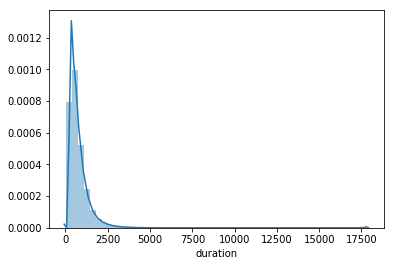

In [129]:
data_target = train1['duration']
sns.distplot(data_target)

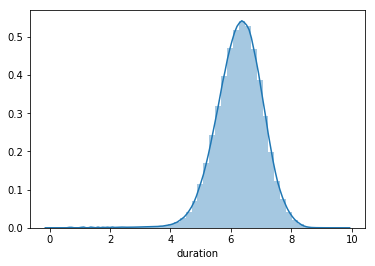

In [130]:
sns.distplot(np.log(data_target))

In [131]:
# Remove observations that fall outside those caps
train1 = train1[(train1['duration'] > 100) & (train1['duration'] < 5000)]

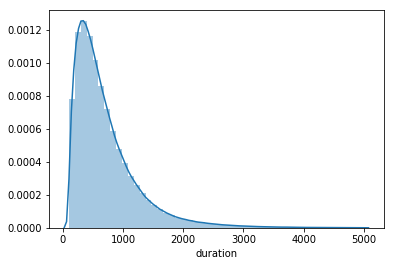

In [132]:
data_target1 = train1['duration']
sns.distplot(data_target1)

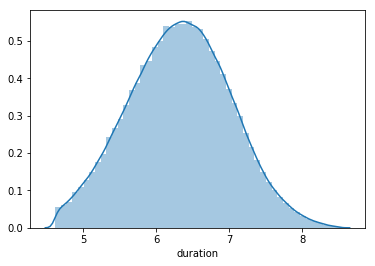

In [133]:
sns.distplot(np.log(data_target1))

In [134]:
#Check the type of each variable
train1.dtypes.reset_index()

,index,0
0,duration,int64
1,pickup_x,float64
2,pickup_y,float64
3,dropoff_x,float64
4,dropoff_y,float64
5,distance,float64
6,month_2,uint8
7,month_3,uint8
8,month_4,uint8
9,month_5,uint8


In [135]:
Y = train1.iloc[:,0].values #duration , target
X = train1.iloc[:,range(1,89)].values #Train features
X.shape

(1274213, 88)

In [136]:
Y1 = np.log(Y)

# Dimensionality Reducation

In [137]:
# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets
import numpy as np

In [138]:
# Standardize the feature matrix
X2 = StandardScaler().fit_transform(X)

# Make sparse matrix
X2_sparse = csr_matrix(X2)

In [139]:
# Create and run an TSVD with one less than number of features
tsvd2 = TruncatedSVD(n_components=X2_sparse.shape[1]-1)
X2_tsvd = tsvd2.fit(X2)

In [140]:
# List of explained variances
tsvd2_var_ratios = tsvd2.explained_variance_ratio_

In [141]:
# Create a function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

In [142]:
# Run function
select_n_components(tsvd2_var_ratios, 0.95)

70

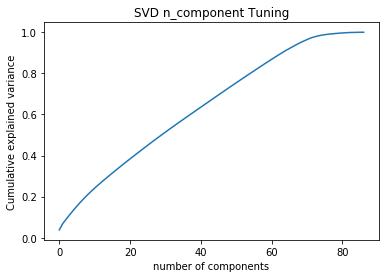

In [143]:
plt.plot(np.cumsum(tsvd2.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("Cumulative explained variance")
plt.title("SVD n_component Tuning")
plt.show()

In [144]:
X.shape

(1274213, 88)

In [145]:
svd = TruncatedSVD(n_components=70, random_state = 12)
data_svd_train = svd.fit_transform(X)

In [146]:
data_svd_test = svd.fit_transform(test1)

In [147]:
data_svd_train.shape

(1274213, 70)

In [148]:
data_svd_test.shape

(100000, 70)

# Model Building

In [90]:
Y1 = np.log(Y)

In [91]:
#Split raw data
X_train, X_test, y_train, y_test = train_test_split(data_svd_train,Y1, random_state=12, test_size=0.2)

# Linear Regression

In [92]:
regressor = LinearRegression() 
regressor.fit(X_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [93]:
#Predict from the test features of raw data
y_pred = regressor.predict(X_test) 

In [94]:
print('RMSE score for the Scaled data Multiple LR raw is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))



print('RMSE score for the Scaled back Multiple LR raw is : {}'.format(np.sqrt(metrics.mean_squared_error(np.exp(y_test),np.exp(y_pred)))))
#print('Variance score for the Multiple LR raw is : %.2f' % regressor.score(X_test, y_test))
#print("\n")

RMSE score for the Scaled data Multiple LR raw is : 0.446817244011624
RMSE score for the Scaled back Multiple LR raw is : 816.1976249120885


# Random forest

In [92]:
# specify parameters and distributions to sample from
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [93]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from time import time

In [94]:
regr1 = RandomForestRegressor(random_state = 12)#max_features='sqrt',min_samples_leaf=4,min_samples_split=3,n_estimators=40, n_jobs=-1)

In [ ]:
param_dist = {"max_depth": [3,4,5,6,7],
              "max_features": ['sqrt' , 'log2' ],
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "n_estimators":[35,40,45]
              }

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(regr1, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X_train, y_train)

print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

In [ ]:
type(X_train)

# RF_________

In [149]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regr1 = RandomForestRegressor()
regr1.fit(X_train, y_train)

y_pred = regr1.predict(X_test)
#rndf_test_predictions = [round(value) for value in y_pred]
#y_pred = regr1.predict(df_train)
#rndf_train_predictions = [round(value) for value in y_pred]



In [104]:
print('RMSE score for the Scaled data RF raw is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))



print('RMSE score for the Scaled back RF raw is : {}'.format(np.sqrt(metrics.mean_squared_error(np.exp(y_test),np.exp(y_pred)))))



RMSE score for the Scaled data RF raw is : 0.31396000403982427
RMSE score for the Scaled back RF raw is : 246.0625648434911


In [105]:
y_pred = x_model.predict(data_svd_test)

In [106]:
z=np.exp(y_pred)

In [108]:
final=pd.DataFrame(z)

In [109]:
final.to_csv("RandomforestGotham.csv",index=False)

# XgBoost

In [98]:
import xgboost as xgb

In [99]:
x_model = xgb.XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=4,
 gamma=0.1,
 subsample=0.8,
 colsample_bytree=0.7,nthread=5)
x_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0.1, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=4, missing=None,
       n_estimators=1000, n_jobs=1, nthread=5, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.8)

In [100]:
y_pred = x_model.predict(X_test)

In [101]:
print('RMSE score for the Scaled data XGB raw is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))



print('RMSE score for the Scaled back XGB raw is : {}'.format(np.sqrt(metrics.mean_squared_error(np.exp(y_test),np.exp(y_pred)))))

RMSE score for the Scaled data XGB raw is : 0.32748703420219316
RMSE score for the Scaled back XGB raw is : 256.380502617653


In [ ]:
y_pred = x_model.predict(data_svd_test)

In [ ]:
z=np.exp(y_pred)

In [ ]:
z

In [ ]:
final=pd.DataFrame(z)

In [ ]:
final.head(10)

In [ ]:
final.columns=['duration']

In [ ]:
final.to_csv("TestSubmit1.csv",index=False)

In [ ]:
df = pd.read_csv("TestSubmit1.csv")

In [ ]:
df.head()